<a href="https://colab.research.google.com/github/sunshineluyao/CV_ML/blob/master/Kmeans/Robust180/BTC_Robustness_Clustering180.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/Fintech_AI/master/data/btc_Kmeans_2020_07_05.csv')
df.head()

,Unnamed: 0,BlkCnt,IssTotNtv,SplyCur,TxTfrValAdjUSD,CapMrktCurUSD,NVTAdj90,PriceUSD,FeeTotUSD,IssTotUSD,AdrActCnt,Volume,Type,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1year,1-2year,2-3year,3-5year,>5year,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Five-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
0,2009-01-03,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#set "date" column as the index
df.set_index('Unnamed: 0', inplace=True)
#to remove the name of the index
df.index.name=None
df.tail()

,BlkCnt,IssTotNtv,SplyCur,TxTfrValAdjUSD,CapMrktCurUSD,NVTAdj90,PriceUSD,FeeTotUSD,IssTotUSD,AdrActCnt,Volume,Type,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1year,1-2year,2-3year,3-5year,>5year,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Five-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
2020-06-28,150.0,937.50,1.841734e+07,1.044929e+09,1.677464e+11,84.965505,9108.065675,178764.564868,8.538812e+06,686270.0,1.456087e+10,BTC,1.883975,1.560580e+10,21.670843,8.717576e+06,1.854689e+10,52.718677,4.709665e+11,1.933909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027537,0.031297,0.033409,0.033409,NaN,NaN,NaN,-3.438650,3.951551,41.497578,27.076373,NaN,NaN,NaN,NaN
2020-06-29,145.0,906.25,1.841825e+07,1.825444e+09,1.691578e+11,85.628193,9184.247366,308429.074080,8.323224e+06,962232.0,1.646055e+10,BTC,1.879341,1.828599e+10,21.383505,8.631653e+06,1.855552e+10,53.691440,9.258904e+11,0.991937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027077,0.031259,0.033407,0.033407,NaN,NaN,NaN,-5.235760,6.146684,42.781408,28.081423,NaN,NaN,NaN,NaN
2020-06-30,147.0,918.75,1.841917e+07,2.063592e+09,1.684243e+11,84.979256,9143.967585,407570.997824,8.401020e+06,926238.0,1.573580e+10,BTC,1.878009,1.779939e+10,21.318103,8.808591e+06,1.856433e+10,52.384807,8.579168e+11,1.065834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026666,0.031133,0.033284,0.033284,NaN,NaN,NaN,-3.073754,3.257085,37.645885,31.628006,NaN,NaN,NaN,NaN
2020-07-01,162.0,1012.50,1.842018e+07,2.197590e+09,1.702271e+11,85.716151,9241.339612,573024.429645,9.356856e+06,1078007.0,1.597155e+10,BTC,1.889464,1.816914e+10,20.887828,9.929881e+06,1.857426e+10,46.966900,1.162099e+12,0.795228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021887,0.031114,0.033233,0.033233,NaN,NaN,NaN,-9.390948,2.941402,36.047259,26.328760,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.633892e+10,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018210,0.031087,0.033219,0.033219,NaN,NaN,NaN,-2.849002,3.872675,36.870157,25.849557,NaN,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)
####Check different styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-bright')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
df['PU_future180d']=df['PU Ratio'].shift(-180)
df['NVT_future180d']=df['NVTAdj90'].shift(-180)
df['PM_future180d']=df['PM'].shift(-180)


In [ ]:
df_180=df[['PU Ratio','PU_future180d','NVTAdj90','NVT_future180d','future180d_ROI','PM','PM_future180d']]

In [ ]:
df_180=df_180.dropna()

In [ ]:
df_180.head()

,PU Ratio,PU_future180d,NVTAdj90,NVT_future180d,future180d_ROI,PM,PM_future180d
2010-10-15,0.463020,1.119958,154.643925,79.217615,786.019103,30.998689,4.099103
2010-10-16,0.418576,1.288265,144.681892,84.173979,888.742343,11.602674,2.624067
2010-10-17,0.434648,1.237092,147.263082,82.118080,864.385428,18.085074,5.711558
2010-10-18,0.432816,1.384352,145.972987,85.980433,922.102400,11.418262,3.980140
2010-10-19,0.391168,1.484788,137.869691,87.829926,1025.760741,4.899486,5.625993


In [ ]:
df_180.tail()

,PU Ratio,PU_future180d,NVTAdj90,NVT_future180d,future180d_ROI,PM,PM_future180d
2019-09-25,42.836382,12.172811,59.499692,61.315945,-23.002288,1.370730,1.455861
2019-09-26,40.204026,13.134281,57.768579,63.573657,-16.271469,1.478249,1.249921
2019-09-27,41.306156,12.582958,58.582589,62.632848,-18.283265,1.605682,1.938508
2019-09-28,41.726024,12.841833,59.040570,63.264534,-17.648407,2.135032,0.853296
2019-09-29,40.490159,11.868722,58.635547,60.623003,-19.514056,2.531822,0.995063


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
### We cluster the data by PU today and after n days
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_180[['PU Ratio','PU_future180d']])
labels180 = model.predict(df_180[['PU Ratio','PU_future180d']])
labels180.reshape(-1,1)
df_180['labels180']=labels180
df_180.head()

,PU Ratio,PU_future180d,NVTAdj90,NVT_future180d,future180d_ROI,PM,PM_future180d,labels180
2010-10-15,0.463020,1.119958,154.643925,79.217615,786.019103,30.998689,4.099103,0
2010-10-16,0.418576,1.288265,144.681892,84.173979,888.742343,11.602674,2.624067,0
2010-10-17,0.434648,1.237092,147.263082,82.118080,864.385428,18.085074,5.711558,0
2010-10-18,0.432816,1.384352,145.972987,85.980433,922.102400,11.418262,3.980140,0
2010-10-19,0.391168,1.484788,137.869691,87.829926,1025.760741,4.899486,5.625993,0


In [ ]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,17.967704,22.714218
1,439.204960,96.111355
2,95.343252,83.985287
3,38.175529,428.085802


In [ ]:
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

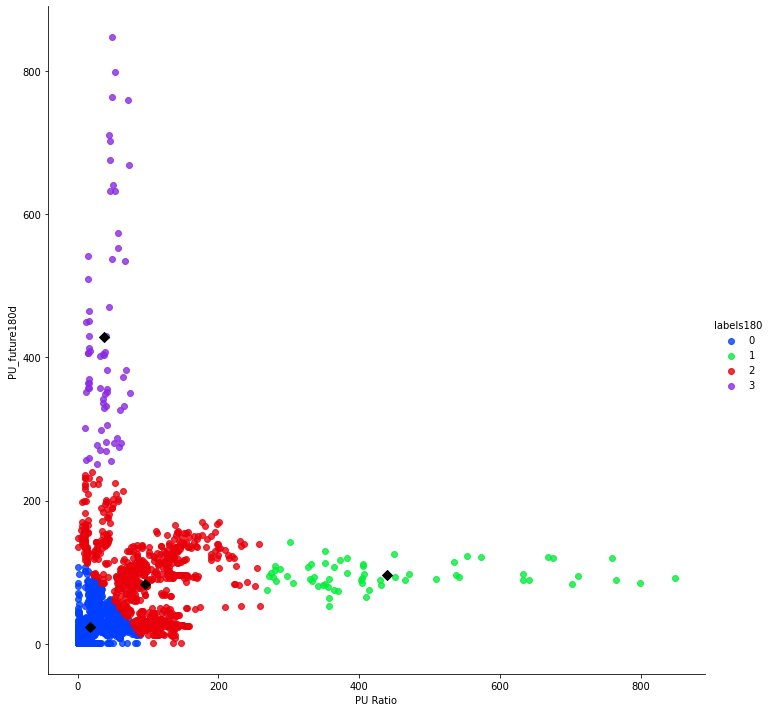

In [ ]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio', 'PU_future180d', data=df_180, hue='labels180', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('PU180_full')

In [ ]:
df_180_ROI=df_180[['future180d_ROI','labels180']].groupby('labels180', as_index=False).agg(['min', 'max','mean','std'])
df_180_ROI.columns = ["_".join(x) for x in df_180_ROI.columns.ravel()]
df_180_ROI.index.name=None
df_180_ROI.head()

,future180d_ROI_min,future180d_ROI_max,future180d_ROI_mean,future180d_ROI_std
0,-87.585958,11519.421767,308.755401,936.060043
1,-66.755748,-24.709613,-48.172903,12.194574
2,-90.097127,14130.353592,109.360730,687.318016
3,290.547135,929.905259,530.223730,149.625530


In [ ]:
df180_PU=df_180[['PU Ratio', 'PU_future180d','labels180']].groupby('labels180').agg(['min', 'max','mean','std'])
df180_PU=df180_PU.transpose()
df180_PU

labels180                    0           1           2           3
PU Ratio      min     0.331285  269.334754    0.622728   10.419346
              max    88.802758  848.128885  259.290818   73.837379
              mean   18.038258  439.204960   95.426163   38.175529
              std    16.910243  149.643526   47.715320   18.218593
PU_future180d min     0.331285   52.472002    0.811427  251.507662
              max   107.019877  141.999079  240.559609  848.128885
              mean   22.728182   96.111355   84.167010  428.085802
              std    20.863302   17.141315   52.512141  151.530528

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

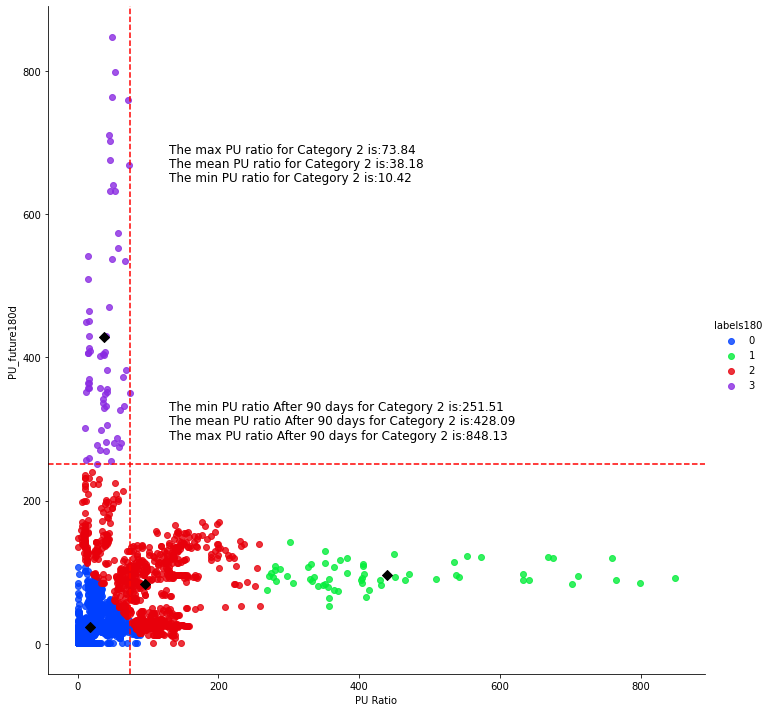

In [ ]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio', 'PU_future180d', data=df_180, hue='labels180', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.axvline(73.84, color='red', linestyle='--')
plt.axhline(251.51, color='red', linestyle='--')
plt.annotate('The max PU ratio for Category 2 is:73.84',
            xy=(130, 700), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The mean PU ratio for Category 2 is:38.18',
            xy=(130, 680), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The min PU ratio for Category 2 is:10.42',
            xy=(130, 660), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)

plt.annotate('The max PU ratio After 90 days for Category 2 is:848.13',
            xy=(130, 300), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The mean PU ratio After 90 days for Category 2 is:428.09',
            xy=(130, 320), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The min PU ratio After 90 days for Category 2 is:251.51',
            xy=(130, 340), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.savefig('PU80_full_annoted')

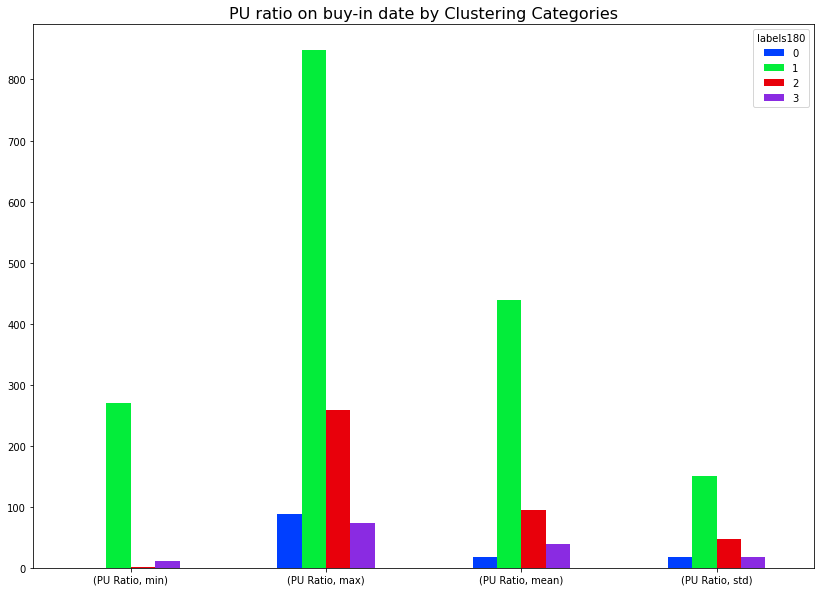

In [ ]:
df180_PU.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('180PU_full_buyin')

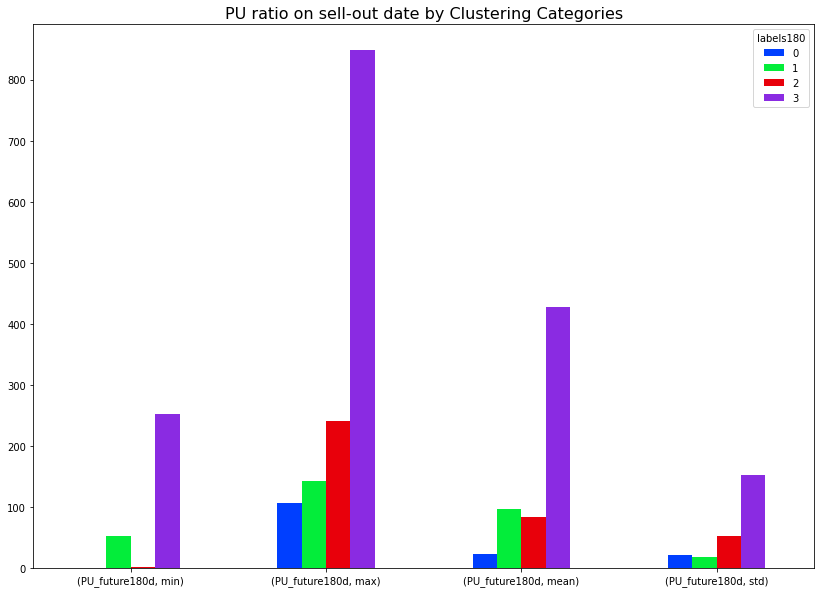

In [ ]:
df180_PU.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('180PU_full_sellout')

In [ ]:
df_180_ROI=df_180_ROI.transpose()
df_180_ROI.columns=['labels180=0', 'labels180=1','labels180=2', 'labels180=3']
df_180_ROI.head()

,labels180=0,labels180=1,labels180=2,labels180=3
future180d_ROI_min,-87.585958,-66.755748,-90.097127,290.547135
future180d_ROI_max,11519.421767,-24.709613,14130.353592,929.905259
future180d_ROI_mean,308.755401,-48.172903,109.360730,530.223730
future180d_ROI_std,936.060043,12.194574,687.318016,149.625530


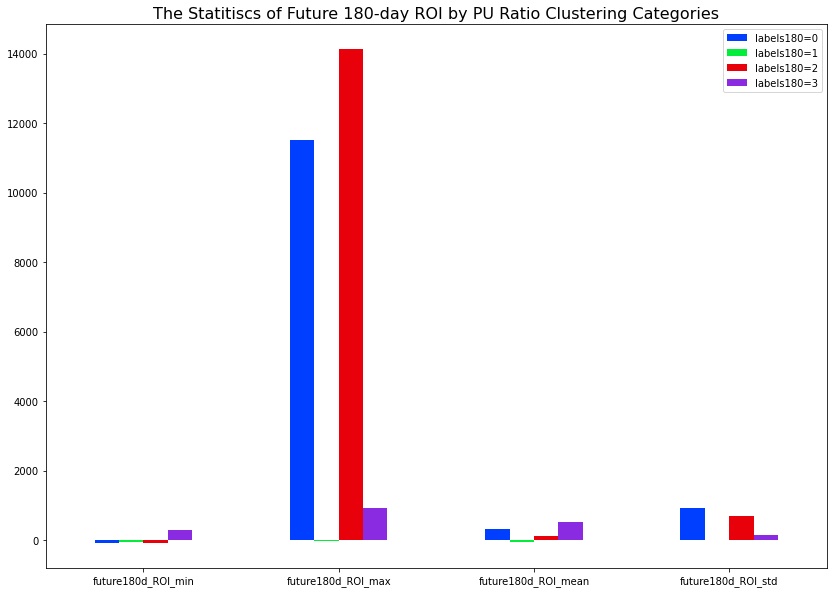

In [ ]:
df_180_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 180-day ROI by PU Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('180ROI_full')

In [ ]:
df_180.head()

,PU Ratio,PU_future180d,NVTAdj90,NVT_future180d,future180d_ROI,PM,PM_future180d,labels180
2010-10-15,0.463020,1.119958,154.643925,79.217615,786.019103,30.998689,4.099103,0
2010-10-16,0.418576,1.288265,144.681892,84.173979,888.742343,11.602674,2.624067,0
2010-10-17,0.434648,1.237092,147.263082,82.118080,864.385428,18.085074,5.711558,0
2010-10-18,0.432816,1.384352,145.972987,85.980433,922.102400,11.418262,3.980140,0
2010-10-19,0.391168,1.484788,137.869691,87.829926,1025.760741,4.899486,5.625993,0


In [ ]:
### We cluster the data by NVT today and after n days
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_180[['NVTAdj90','NVT_future180d']])
labels180_NVT = model.predict(df_180[['NVTAdj90','NVT_future180d']])
labels180_NVT.reshape(-1,1)
df_180['labels180_NVT']=labels180_NVT
df_180.head()

,PU Ratio,PU_future180d,NVTAdj90,NVT_future180d,future180d_ROI,PM,PM_future180d,labels180,labels180_NVT
2010-10-15,0.463020,1.119958,154.643925,79.217615,786.019103,30.998689,4.099103,0,3
2010-10-16,0.418576,1.288265,144.681892,84.173979,888.742343,11.602674,2.624067,0,3
2010-10-17,0.434648,1.237092,147.263082,82.118080,864.385428,18.085074,5.711558,0,3
2010-10-18,0.432816,1.384352,145.972987,85.980433,922.102400,11.418262,3.980140,0,3
2010-10-19,0.391168,1.484788,137.869691,87.829926,1025.760741,4.899486,5.625993,0,3


In [ ]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,64.306418,73.199650
1,43.643854,42.314276
2,171.845717,150.274746
3,151.402087,35.603974


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

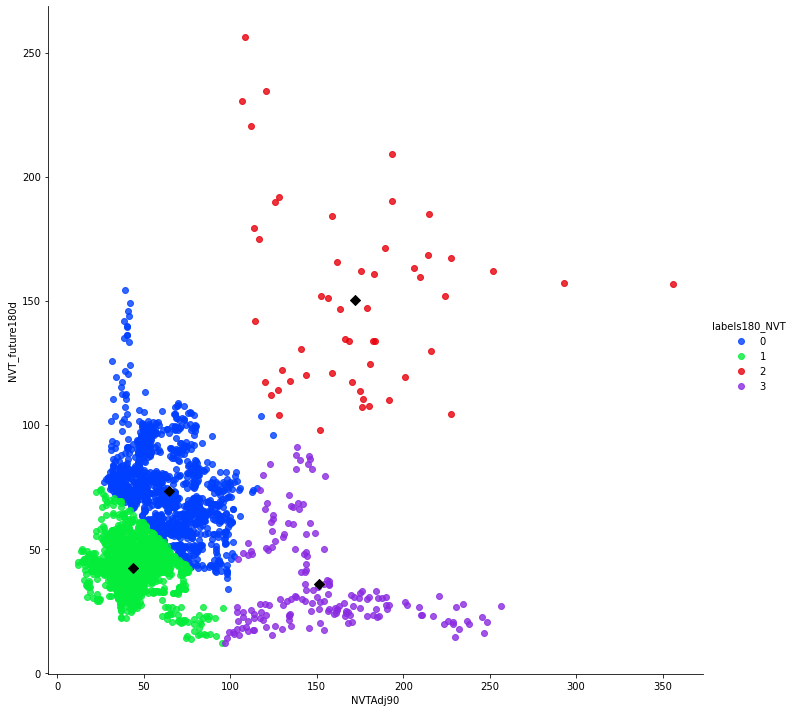

In [ ]:
plt.figure(figsize=(14, 10))
sns.lmplot('NVTAdj90', 'NVT_future180d', data=df_180, hue='labels180_NVT', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('NVT180_full')

In [ ]:
df_180_ROI=df_180[['future180d_ROI','labels180_NVT']].groupby('labels180_NVT', as_index=False).agg(['min', 'max','mean','std'])
df_180_ROI.columns = ["_".join(x) for x in df_180_ROI.columns.ravel()]
df_180_ROI.index.name=None
df_180_ROI.head()

,future180d_ROI_min,future180d_ROI_max,future180d_ROI_mean,future180d_ROI_std
0,-72.154165,7921.296584,60.506527,339.370298
1,-83.624579,1421.459550,173.142789,231.321935
2,733.502203,14130.353592,3647.908616,3261.507428
3,-90.097127,7339.569520,1478.502973,2073.005443


In [ ]:
df180_NVT=df_180[['NVTAdj90', 'NVT_future180d','labels180_NVT']].groupby('labels180_NVT').agg(['min', 'max','mean','std'])
df180_NVT=df180_NVT.transpose()
df180_NVT

labels180_NVT                 0          1           2           3
NVTAdj90       min    26.661871  11.810125  106.856060   96.893294
               max   124.403714  95.832027  355.931337  256.362055
               mean   64.306418  43.643854  171.845717  151.402087
               std    18.665100  12.720376   47.798626   36.813903
NVT_future180d min    33.930015  11.818506   97.857132   11.810125
               max   154.082818  74.036997  256.362055   90.874008
               mean   73.199650  42.314276  150.274746   35.603974
               std    16.347130   9.030486   37.037233   19.213055

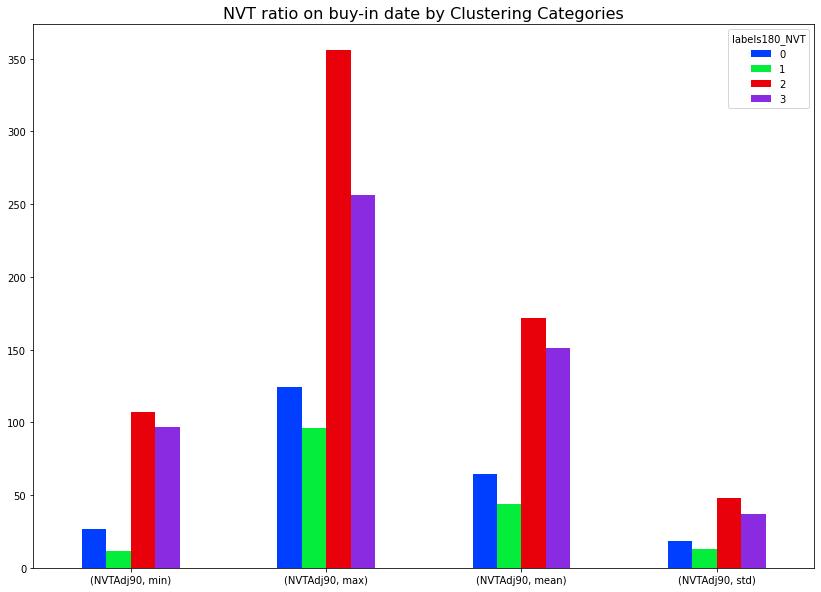

In [ ]:
df180_NVT.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('NVT ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('180NVT_full_buyin')

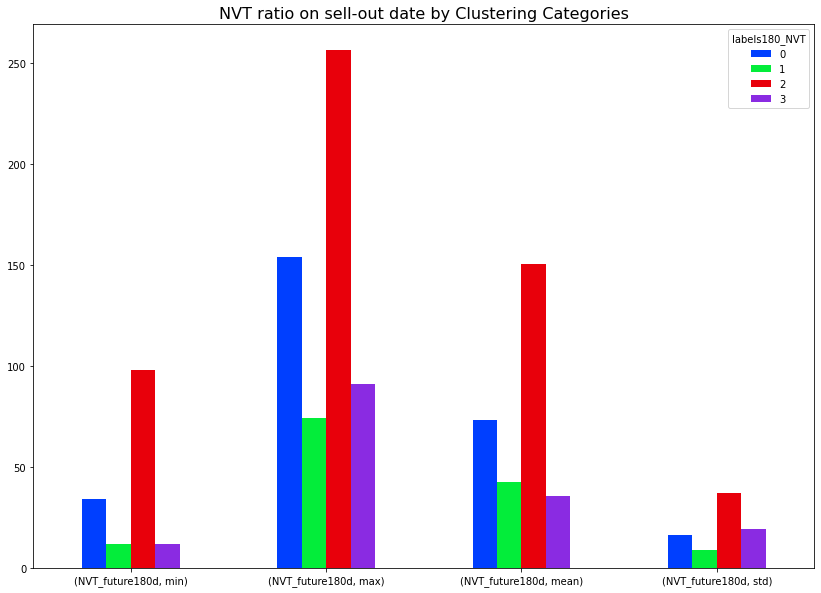

In [ ]:
df180_NVT.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('NVT ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('180NVT_full_sellout')

In [ ]:
df_180_ROI=df_180_ROI.transpose()
df_180_ROI.columns=['labels180_NVT=0', 'labels180_NVT=1','labels180_NVT=2', 'labels180_NVT=3']
df_180_ROI.head()

,labels180_NVT=0,labels180_NVT=1,labels180_NVT=2,labels180_NVT=3
future180d_ROI_min,-72.154165,-83.624579,733.502203,-90.097127
future180d_ROI_max,7921.296584,1421.459550,14130.353592,7339.569520
future180d_ROI_mean,60.506527,173.142789,3647.908616,1478.502973
future180d_ROI_std,339.370298,231.321935,3261.507428,2073.005443


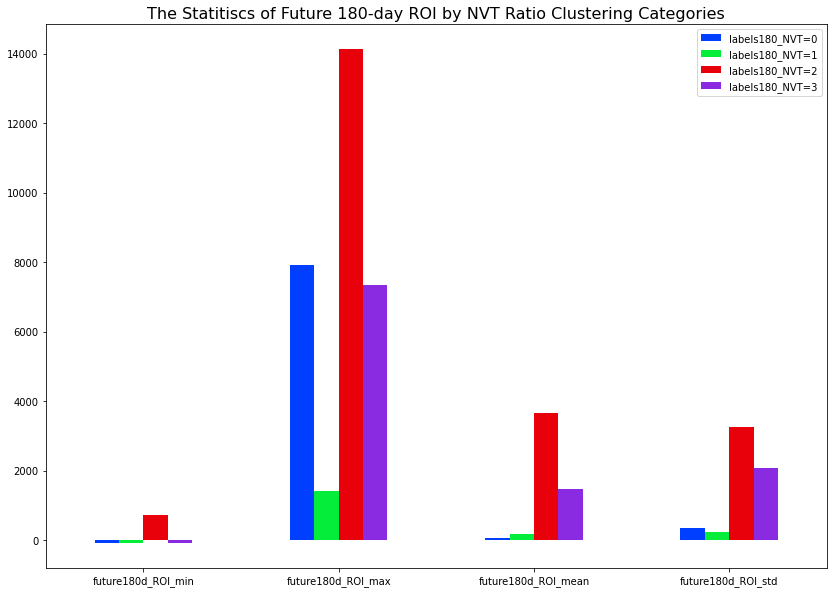

In [ ]:
df_180_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 180-day ROI by NVT Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('180ROI_full_NVT')

In [ ]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_180[['PM','PM_future180d']])
labels180 = model.predict(df_180[['PM','PM_future180d']])
labels180.reshape(-1,1)
df_180['labels180']=labels180
df_180.head()

,PU Ratio,PU_future180d,NVTAdj90,NVT_future180d,future180d_ROI,PM,PM_future180d,labels180,labels180_NVT
2010-10-15,0.463020,1.119958,154.643925,79.217615,786.019103,30.998689,4.099103,2,3
2010-10-16,0.418576,1.288265,144.681892,84.173979,888.742343,11.602674,2.624067,2,3
2010-10-17,0.434648,1.237092,147.263082,82.118080,864.385428,18.085074,5.711558,2,3
2010-10-18,0.432816,1.384352,145.972987,85.980433,922.102400,11.418262,3.980140,2,3
2010-10-19,0.391168,1.484788,137.869691,87.829926,1025.760741,4.899486,5.625993,0,3


In [ ]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,1.436474,1.260126
1,49.837862,5.148512
2,19.092676,3.321805
3,105.480729,8.705485


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

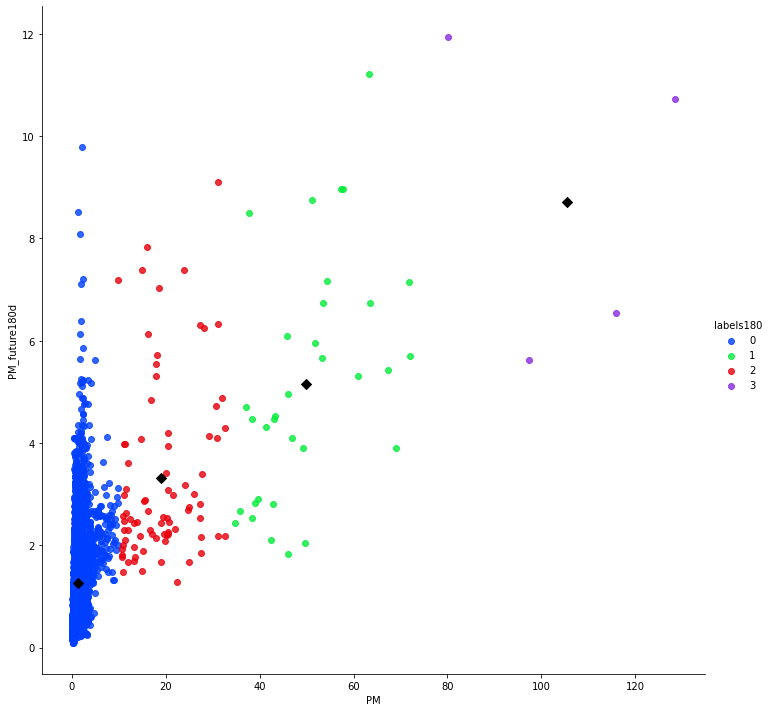

In [ ]:
plt.figure(figsize=(14, 10))
sns.lmplot('PM','PM_future180d', data=df_180, hue='labels180', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('PM180_full')

In [ ]:
df_180_ROI=df_180[['future180d_ROI','labels180']].groupby('labels180', as_index=False).agg(['min', 'max','mean','std'])
df_180_ROI.columns = ["_".join(x) for x in df_180_ROI.columns.ravel()]
df_180_ROI.index.name=None
df_180_ROI.head()

,future180d_ROI_min,future180d_ROI_max,future180d_ROI_mean,future180d_ROI_std
0,-90.097127,6380.407411,133.100603,279.892110
1,683.000046,14130.353592,3109.623434,2936.933079
2,-51.750187,12527.431587,3798.382864,2713.549561
3,733.886349,2195.245904,1588.496284,638.324696


In [ ]:
df180_PM=df_180[['PM','PM_future180d','labels180']].groupby('labels180').agg(['min', 'max','mean','std'])
df180_PM=df180_PM.transpose()
df180_PM

labels180                  0          1          2           3
PM            min   0.081659  34.732677   9.865902   80.100067
              max   9.977635  71.973830  32.631956  128.418139
              mean  1.436474  49.837862  19.092676  105.480729
              std   1.400546  10.954156   6.694704   21.176344
PM_future180d min   0.081659   1.830157   1.277352    5.615563
              max   9.781603  11.224044   9.100518   11.943117
              mean  1.260126   5.148512   3.321805    8.705485
              std   1.004483   2.358666   1.745244    3.098419

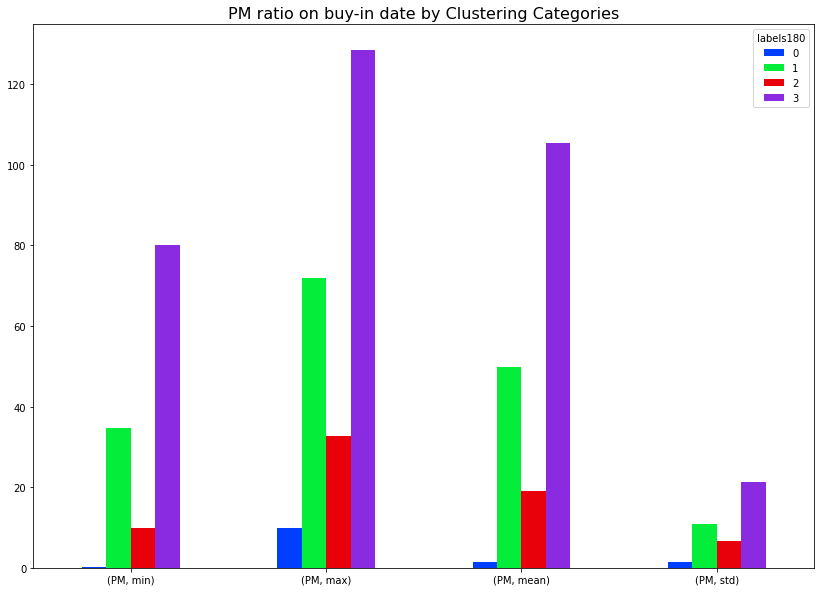

In [ ]:
df180_PM.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PM ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('180PM_full_buyin')

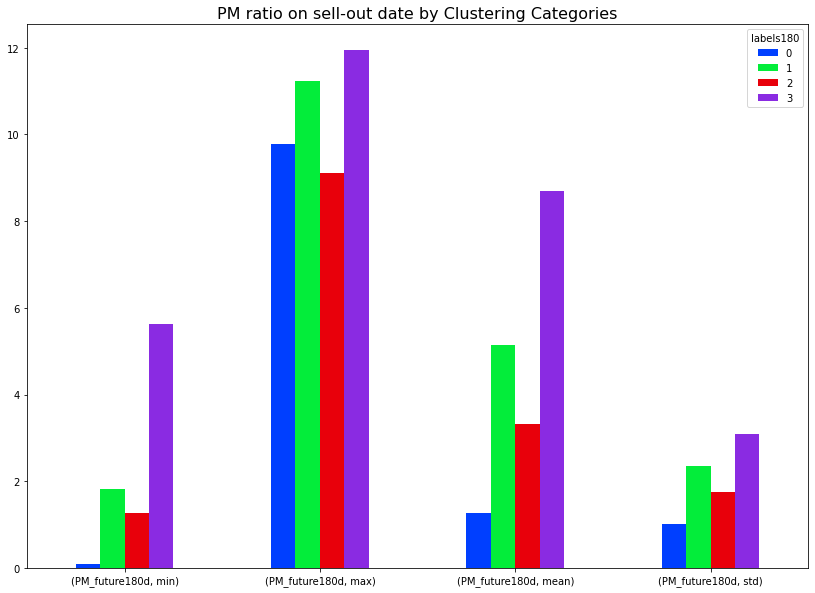

In [ ]:
df180_PM.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PM ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('180PM_full_sell-out')

In [ ]:
df_180_ROI=df_180_ROI.transpose()
df_180_ROI.columns=['labels180=0', 'labels180=1','labels180=2', 'labels180=3']
df_180_ROI.head()

,labels180=0,labels180=1,labels180=2,labels180=3
future180d_ROI_min,-90.097127,683.000046,-51.750187,733.886349
future180d_ROI_max,6380.407411,14130.353592,12527.431587,2195.245904
future180d_ROI_mean,133.100603,3109.623434,3798.382864,1588.496284
future180d_ROI_std,279.892110,2936.933079,2713.549561,638.324696


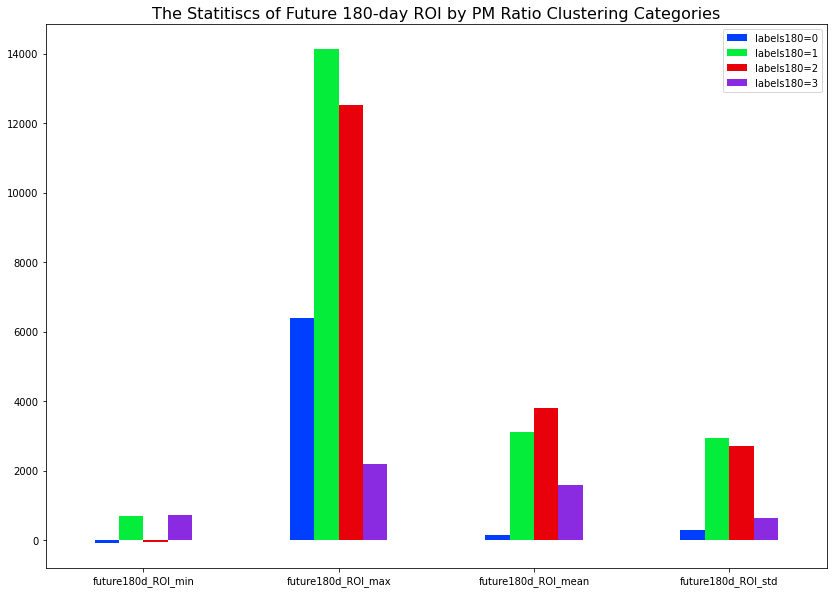

In [ ]:
df_180_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 180-day ROI by PM Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('180ROI_fullPM')

In [ ]:
df.to_csv('btc_Kmeans_robust180_2020_07_05.csv')